# Day4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import comcast data into Python environment.
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [3]:
df.isnull().values.any()

True

In [4]:
df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


# Quesion 1:How many different companies are represented in the data set?

In [4]:
print(df["Company Name"].nunique())

439


In [5]:
# Answer 439 different companies are represented in the data set

# Quesion 2:What is the total number of jobs created for businesses in Queens?

In [6]:
df['City'].str.contains('Queens',case=False).sum()

73

In [7]:
# Answer: 73 total number of jobs created for businesses in Queens.

# Question 3: How many different unique email domains names are there in the data set?

In [8]:
df['domain'] = df['company email'].str.split('@').str[1]

In [9]:
df['domain'].value_counts()

gmail.com               30
aol.com                 22
energyspec.com           3
silvercupstudios.com     3
yahoo.com                3
                        ..
nyfusa.com               1
evergreene.com           1
storagedeluxe.com        1
jcrew.com                1
approvedoil.com          1
Name: domain, Length: 356, dtype: int64

In [10]:
df['domain'].nunique()

356

In [11]:
# Answer: 356 different unique email domains names are there in the data set.

# Qustion 4 and 5: Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? Save your result for the previous question as a CSV file.

In [21]:
df_new = df[['NTA', 'Job created', 'Total Savings']]
df_new 

,NTA,Job created,Total Savings
0,Midwood,NaN,0.00
1,SoHo-TriBeCa-Civic Center-Little Italy,NaN,136578.20
2,Battery Park City-Lower Manhattan,NaN,302959.40
3,Sunset Park West,NaN,2159.67
4,Battery Park City-Lower Manhattan,NaN,922407.32
...,...,...,...
445,Bushwick South,10.0,35384.76
446,Bushwick South,NaN,1457.26
447,Mariner's Harbor-Arlington-Port Ivory-Granitev...,NaN,8971.02
448,Crown Heights North,NaN,2484.84


In [22]:
Total_Job_created=df_new .groupby(by='NTA')['Job created'].sum().to_frame()

pd.set_option('display.max_columns', None)
Total_Job_created
df1 = Total_Job_created.rename({'Job created': 'Total_Job_created'}, axis=1)
df1

,Total_Job_created
NTA,
Astoria,0.0
Baisley Park,0.0
Battery Park City-Lower Manhattan,0.0
Bedford,0.0
Bensonhurst West,0.0
...,...
Whitestone,10.0
Williamsburg,0.0
Windsor Terrace,0.0


In [23]:
Avg_total_saving=df_new .groupby(by='NTA')['Total Savings'].mean().to_frame()
#Avg_total_saving=Avg_total_saving.to_frame()
Avg_total_saving
df2 = Avg_total_saving.rename({'Total Savings': 'Avg_saving'}, axis=1)
df2

,Avg_saving
NTA,
Astoria,11409.986667
Baisley Park,21522.740000
Battery Park City-Lower Manhattan,469890.796667
Bedford,62113.343333
Bensonhurst West,-379.470000
...,...
Whitestone,62038.306667
Williamsburg,23570.080000
Windsor Terrace,78573.320000


In [38]:
Avg=df1.merge(df2, how = "right" ,on ='NTA')
Avg=Avg.loc[~(Avg['Total_Job_created']==0)]

In [39]:
Avg.to_csv('Average_Job_and_saving.csv', index=True)

In [43]:
Avg

,Total_Job_created,Avg_saving
NTA,,
Bushwick South,10.0,26140.455000
College Point,2.0,17159.372857
East New York,15.0,48433.093333
Hunts Point,12.0,39246.016154
Maspeth,10.0,6658.283333
Mott Haven-Port Morris,10.0,17843.937857
Steinway,20.0,11227.155714
Whitestone,10.0,62038.306667


# Day 5

# Question:  scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

In [40]:
dff = pd.read_csv("Average_Job_and_saving.csv")

In [41]:
x=dff['Total_Job_created']
y=dff['Avg_saving']

(1000.0, 100000.0)

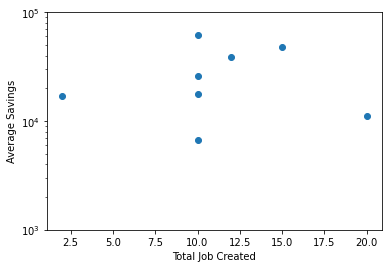

In [53]:

plt.xlabel('Total Job Created')
plt.ylabel('Average Savings')
plt.yscale('log')
plt.scatter(x, y)
plt.ylim([10e2, 10e4])

In [54]:
#histogram of the log of the average total savings.

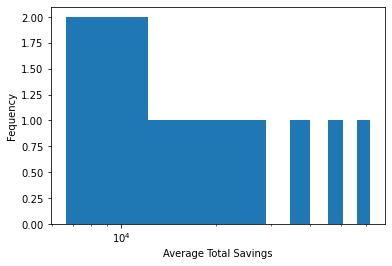

In [55]:
fig = plt.figure()
 
plt.hist(y)
plt.xscale('log')
plt.xlabel('Average Total Savings')
plt.ylabel('Fequency')
plt.show() 

In [56]:
#Import comcast data into Python environment.
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

# Question: line plot of the total jobs created for each month.

In [63]:
df_date = df[['Effective Date', 'Job created']]

df_date

,Effective Date,Job created
0,03/04/2005,NaN
1,04/02/2008,NaN
2,01/05/2015,NaN
3,02/03/2020,NaN
4,06/30/2017,NaN
...,...,...
445,12/09/2008,10.0
446,12/05/2017,NaN
447,08/03/2018,NaN
448,01/26/2016,NaN


In [64]:
df_date["Effective Date"] = pd.to_datetime(df_date["Effective Date"])

<ipython-input-64-89f7e8cc1f05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date["Effective Date"] = pd.to_datetime(df_date["Effective Date"])


In [65]:
df_date = df_date.set_index(df_date["Effective Date"])

In [66]:
# set month dataframe for plotting complaint volume against month
Total_job=df_date["Effective Date"].value_counts().sort_index()
Total_job

1993-02-05    1
2004-03-05    1
2005-02-03    1
2005-03-04    1
2005-06-30    1
             ..
2020-05-12    1
2020-06-04    1
2020-06-05    3
2020-06-29    1
2020-07-07    1
Name: Effective Date, Length: 366, dtype: int64

In [67]:
Monthly_Total_job = df_date.groupby(pd.Grouper(freq="M"))['Job created'].sum()
Monthly_Total_job

Effective Date
1993-02-28    15.0
1993-03-31     0.0
1993-04-30     0.0
1993-05-31     0.0
1993-06-30     0.0
              ... 
2020-03-31     0.0
2020-04-30     0.0
2020-05-31     0.0
2020-06-30     0.0
2020-07-31     0.0
Freq: M, Name: Job created, Length: 330, dtype: float64

Text(0, 0.5, 'Total Job Created')

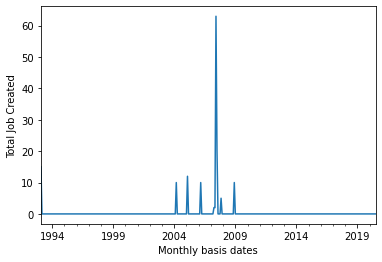

In [68]:
Monthly_Total_job.plot()
plt.xlabel('Monthly basis dates')
plt.ylabel('Total Job Created')